In [1]:
# Libraries
from waveome.model_search import GPKernelSearch
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data in
df = pd.read_excel("newdata.xlsx", sheet_name="Data")

In [3]:
df.describe()

,individual_id,age stool sample,birth weight,Age at breast milk sample,Gestational by weight percentagete,(14 or 15)-methylpalmitate (a17:0 or i17:0),(S)-3-hydroxybutyrylcarnitine,"1,3-propanediol",(16 or 17)-methylstearate (a19:0 or i19:0),(2 or 3)-decenoate (10:1n7 or n8),...,vanillic acid glycine,vanillic alcohol sulfate,vanillin,vanillin sulfate,vanillylmandelate (VMA),vitamin D3 sulfate,xanthine,xanthosine,xanthurenate,xylose
count,54.000000,54.000000,54.000000,54.000000,54.000000,5.200000e+01,5.300000e+01,5.400000e+01,5.400000e+01,45.000000,...,3.600000e+01,23.000000,4.600000e+01,2.500000e+01,4.700000e+01,5.000000e+01,4.800000e+01,3.900000e+01,4.400000e+01,3.100000e+01
mean,23.851852,36.314815,1.174259,34.722222,0.486481,1.670429e+08,1.089020e+06,1.745594e+07,2.367860e+07,261710.696447,...,5.478220e+05,55736.605639,6.292408e+06,1.861427e+05,1.025958e+06,3.551511e+05,4.649764e+06,1.694729e+05,2.797703e+05,5.371819e+05
std,6.967329,20.402390,0.694718,20.605382,0.323852,1.487104e+08,1.372112e+06,3.296388e+07,3.172546e+07,205794.693281,...,1.530963e+06,46895.186069,2.426761e+07,4.324944e+05,3.563612e+06,2.758712e+05,5.978620e+06,2.882061e+05,3.477605e+05,5.814829e+05
min,13.000000,4.000000,0.375000,4.000000,0.000000,8.937702e+06,8.521579e+04,3.100731e+05,8.122406e+05,55831.793000,...,1.809864e+04,16579.863300,1.245159e+05,1.782370e+04,3.371150e+04,6.948115e+04,5.148703e+04,2.286459e+04,2.729611e+04,1.100291e+05
25%,18.000000,18.250000,0.730000,16.000000,0.170000,5.828550e+07,2.329742e+05,1.270946e+06,8.494135e+06,124937.304700,...,6.248101e+04,27849.747100,6.884901e+05,4.620758e+04,1.894588e+05,1.777093e+05,7.662598e+05,5.403422e+04,9.877795e+04,2.206599e+05
50%,24.000000,32.000000,0.920000,31.000000,0.450000,1.386036e+08,4.126429e+05,2.925479e+06,1.290118e+07,186267.437500,...,1.363951e+05,36864.613300,1.458910e+06,6.716898e+04,3.034390e+05,2.680113e+05,2.261219e+06,1.038421e+05,1.508422e+05,3.469095e+05
75%,29.750000,45.000000,1.493750,44.750000,0.815000,2.102269e+08,1.535548e+06,1.120748e+07,2.431478e+07,309646.437500,...,4.356591e+05,70890.925750,2.764077e+06,1.327357e+05,7.466745e+05,4.599339e+05,6.029720e+06,1.412626e+05,3.421582e+05,6.183724e+05
max,36.000000,95.000000,3.530000,93.000000,0.970000,6.703076e+08,6.466390e+06,1.712676e+08,1.752702e+08,890232.187500,...,8.948318e+06,217202.109400,1.645989e+08,2.211262e+06,2.474731e+07,1.365310e+06,2.838463e+07,1.775177e+06,2.030316e+06,3.313076e+06


0    209540736.0
1     64304788.0
2     50068000.0
3     27948390.0
4     31650362.0
Name: (14 or 15)-methylpalmitate (a17:0 or i17:0), dtype: float64
0    19.160429
1    17.979145
2    17.728893
3    17.145870
4    17.270260
Name: (14 or 15)-methylpalmitate (a17:0 or i17:0), dtype: float64


<Axes: >

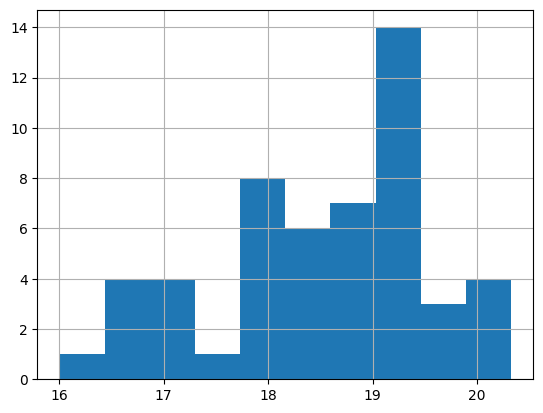

In [4]:
# Import library for normalization
import numpy as np

# Original vs tranformed variables
print(df.iloc[:5, 7])
print(np.log(df.iloc[:5,7]))

np.log(df.iloc[:,7]).hist()

In [5]:
# Need to recode categorical as numeric for search
df["Breast milk collected"], bmc_values = pd.factorize(df["Breast milk collected"])

In [6]:
# Specify covariates
covariate_list = [
    "individual_id", "age stool sample",
    "birth weight", "Age at breast milk sample",
    "Gestational by weight percentagete",
    "Breast milk collected"
]

In [7]:
column_names = df.columns.tolist()
#print(column_names[7:])
y = df[column_names[7:]] = df[column_names[7:]].astype(float)
na = y.isna().mean(axis=0)
sort = na.sort_values(ascending=True)
Y_subset = sort[1:101] #microbes with no missing values
#rank lowest to highest
#Y = Y_subset
print(Y_subset[1:101])

3-(4-hydroxyphenyl)lactate (HPLA)    0.0
N-acetylaspartate (NAA)              0.0
N-acetylasparagine                   0.0
3-amino-2-piperidone                 0.0
creatinine                           0.0
                                    ... 
malate                               0.0
lyxonate                             0.0
lysine                               0.0
linolenate (18:3n3 or 3n6)           0.0
fructosyllysine                      0.0
Length: 99, dtype: float64


In [8]:
# create new dataset with Y_subset

df2 = pd.read_excel("data.xlsx")

df2.describe()

,individual_id,age stool sample,birth weight,Age at breast milk sample,Gestational by weight percentagete,3-(4-hydroxyphenyl)lactate (HPLA),N-acetylaspartate (NAA),N-acetylasparagine,3-amino-2-piperidone,creatinine,...,methionine sulfoxide,diethanolamine,dihomolinoleate (20:2n6),malate,maleate,malonate,lysine,lyxonate,linolenate (18:3n3 or 3n6),fructosyllysine
count,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,...,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01
mean,23.851852,36.314815,1.174259,34.722222,0.486481,2.363378e+07,2.745061e+07,8.405386e+05,2.780160e+06,1.263254e+08,...,1.576465e+07,2.200119e+06,9.247525e+08,8.342751e+07,1.342273e+06,6.998078e+06,3.116868e+08,1.257637e+08,1.296832e+09,3.897374e+07
std,6.967329,20.402390,0.694718,20.605382,0.323852,7.652249e+07,5.189364e+07,9.693073e+05,1.858191e+06,1.140388e+08,...,2.309926e+07,1.418576e+06,1.238466e+09,2.027762e+08,1.867830e+06,5.239385e+06,3.586284e+08,2.025985e+08,9.190133e+08,7.515334e+07
min,13.000000,4.000000,0.375000,4.000000,0.000000,4.383162e+05,9.279752e+04,1.260654e+05,1.709019e+05,6.922502e+06,...,1.103940e+06,4.404898e+05,5.820278e+06,5.818559e+06,1.542627e+05,1.618866e+06,3.645219e+06,2.085199e+06,1.569591e+06,2.138891e+05
25%,18.000000,18.250000,0.730000,16.000000,0.170000,3.544916e+06,4.800447e+06,2.494522e+05,1.466654e+06,4.447273e+07,...,5.661143e+06,1.386567e+06,2.179579e+08,1.514429e+07,5.306037e+05,3.544160e+06,3.104195e+07,2.596156e+07,7.468695e+08,3.348370e+06
50%,24.000000,32.000000,0.920000,31.000000,0.450000,8.012552e+06,8.633987e+06,6.130716e+05,2.073627e+06,8.608675e+07,...,9.034698e+06,1.769246e+06,5.179121e+08,3.952390e+07,9.767101e+05,5.444212e+06,2.107798e+08,5.399664e+07,1.188147e+09,9.710726e+06
75%,29.750000,45.000000,1.493750,44.750000,0.815000,1.667008e+07,2.456084e+07,9.883275e+05,3.580300e+06,1.681024e+08,...,1.622513e+07,2.475056e+06,1.099771e+09,7.445228e+07,1.555502e+06,8.945515e+06,4.439407e+08,1.704977e+08,1.800735e+09,2.303295e+07
max,36.000000,95.000000,3.530000,93.000000,0.970000,5.546803e+08,3.353542e+08,5.754130e+06,8.939971e+06,5.036264e+08,...,1.531235e+08,7.288645e+06,6.140732e+09,1.455099e+09,1.371258e+07,3.002371e+07,1.799641e+09,1.293623e+09,3.947862e+09,3.861198e+08


0    49635776.0
1     5638919.5
2    14213608.0
3     3691417.0
4    20562424.0
Name: 3-(4-hydroxyphenyl)lactate (HPLA), dtype: float64
0    17.720222
1    15.545203
2    16.469710
3    15.121521
4    16.838976
Name: 3-(4-hydroxyphenyl)lactate (HPLA), dtype: float64


<Axes: >

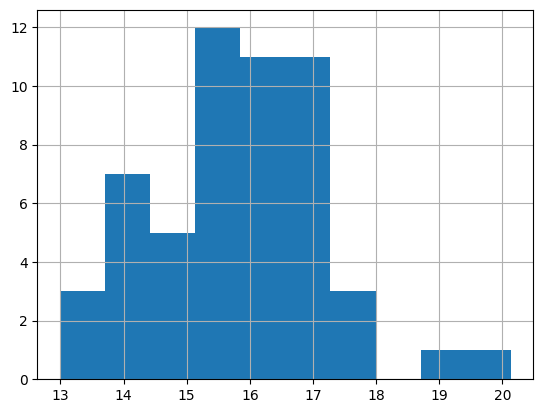

In [9]:
# Original vs tranformed variables
print(df2.iloc[:5, 7])
print(np.log(df2.iloc[:5,7]))

np.log(df2.iloc[:,7]).hist()

In [10]:
# Need to recode categorical as numeric for search
df2["Breast milk collected"], bmc_values = pd.factorize(df["Breast milk collected"])

column_names = df2.columns.tolist()
#print(column_names[7:])
Y = df2[column_names[7:]] = df[column_names[7:]].astype(float)

In [11]:
# Transform my outcome variables to be more normal
Y = np.log(Y)


# Finally scale them so the variance = 1 (easier for model convergence)
Y = Y/Y.std()

# Take a look at the outcomes
Y.head()


,3-(4-hydroxyphenyl)lactate (HPLA),N-acetylaspartate (NAA),N-acetylasparagine,3-amino-2-piperidone,creatinine,N-acetylalanine,N-acetyl-isoputreanine,"bilirubin degradation product, C16H18N2O5 (1)",cysteine,3-formylindole,...,methionine sulfoxide,diethanolamine,dihomolinoleate (20:2n6),malate,maleate,malonate,lysine,lyxonate,linolenate (18:3n3 or 3n6),fructosyllysine
0,13.173667,10.885892,13.704882,21.049578,16.140995,18.013239,13.004303,18.521391,19.649033,18.967966,...,15.884947,27.496978,13.505473,17.796818,16.073384,24.151331,12.386884,12.516457,11.861113,7.880678
1,11.556702,10.868683,14.137014,20.769241,15.405739,17.526192,11.939707,16.518677,20.749486,20.461972,...,15.091496,28.296065,12.200894,15.663524,15.844413,23.343449,10.955663,14.011910,11.785238,8.691068
2,12.244004,10.781248,14.183318,20.979340,15.905113,17.902162,12.364595,17.485432,21.937917,19.731013,...,15.345752,26.701169,12.612927,15.288848,16.658866,22.179374,10.902448,14.761148,11.692815,9.208015
3,11.241726,10.726193,15.322184,21.508131,18.345438,16.646640,13.317183,18.807500,20.474748,21.434052,...,17.429034,27.062094,11.602849,16.562552,17.641928,24.393907,12.214734,15.866246,11.903650,11.223938
4,12.518526,12.723700,16.268183,23.315388,18.306746,17.922631,14.406779,19.828612,20.259579,18.514565,...,16.351505,28.915689,12.520545,14.786491,17.644527,22.869200,13.336959,12.849952,11.717985,8.528083


In [12]:
# Load up search object
gps = GPKernelSearch(
    X=df[covariate_list].astype(float),
    Y=Y,
    unit_col="individual_id",
    categorical_vars=["Breast milk collected"]
)

In [13]:
# Run search (takes ~4mins)
gps.run_search(random_seed=1)

Kernel search: 100%|██████████| 90/90 [1:51:56<00:00, 74.63s/it] 


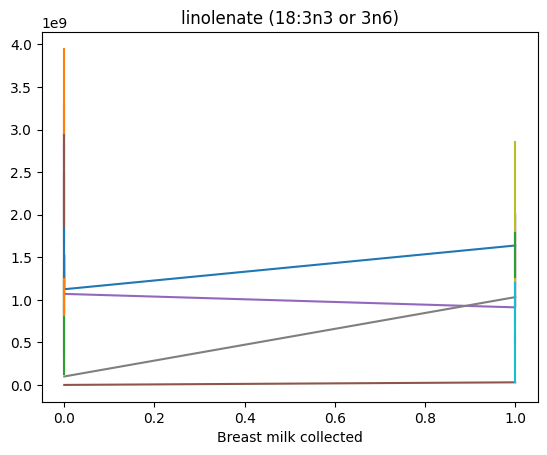

In [14]:
# Plot the data
for out in range(1, 2):
    for i in df.individual_id.unique():
        plt.plot(df.loc[df.individual_id == i, 'Breast milk collected'], df.loc[df.individual_id == i, 'linolenate (18:3n3 or 3n6)'])
    plt.title('linolenate (18:3n3 or 3n6)')
    plt.xlabel('Breast milk collected')
    plt.show()

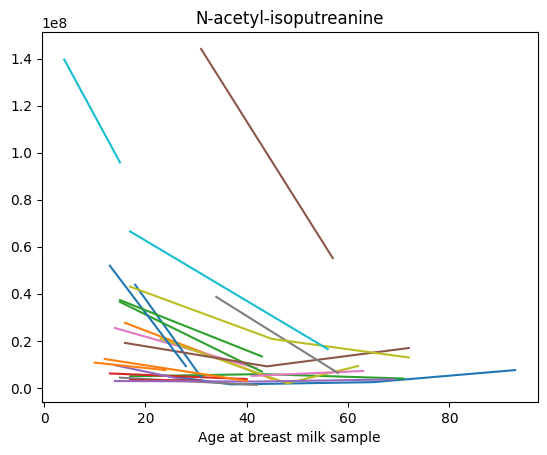

In [15]:
# Plot the data
for out in range(1, 2):
    for i in df.individual_id.unique():
        plt.plot(df.loc[df.individual_id == i, 'Age at breast milk sample'], df.loc[df.individual_id == i, 'N-acetyl-isoputreanine'])
    plt.title('N-acetyl-isoputreanine')
    plt.xlabel('Age at breast milk sample')
    plt.show()

In [16]:
 #gps.models["linolenate (18:3n3 or 3n6)"]

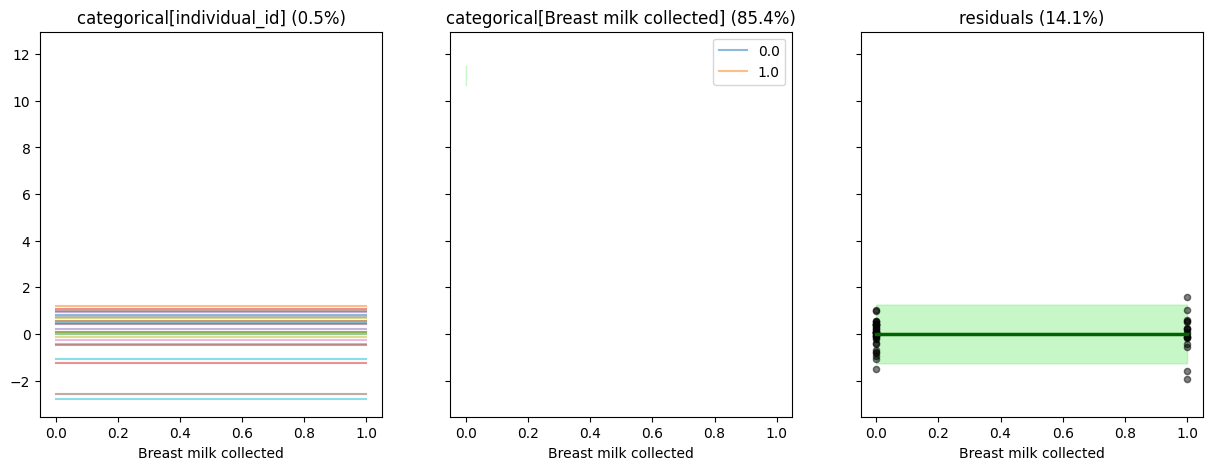

In [17]:
gps.plot_parts(
    out_label='linolenate (18:3n3 or 3n6)',
    x_axis_label='Breast milk collected'
);

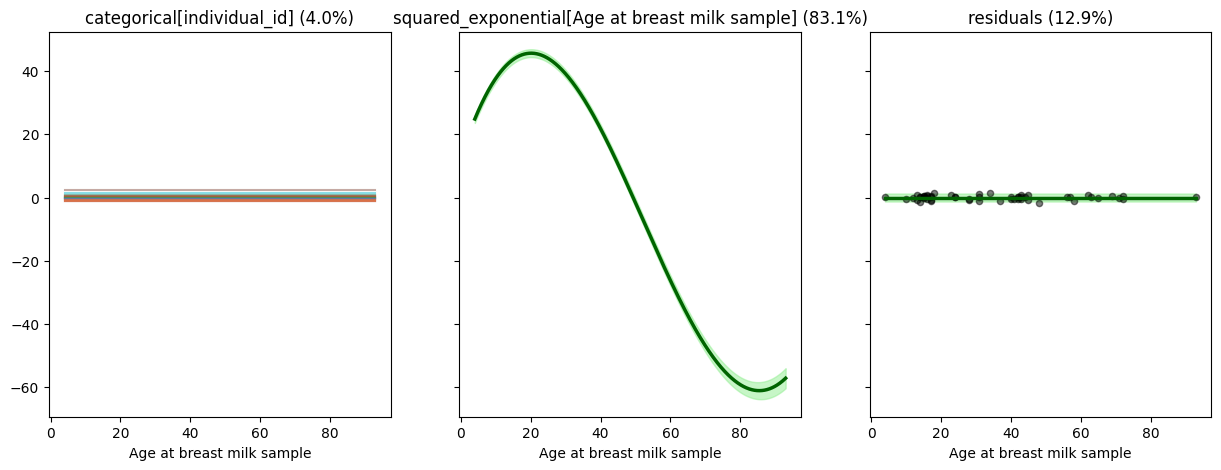

In [18]:
gps.plot_parts(
    out_label='N-acetyl-isoputreanine',
    x_axis_label='Age at breast milk sample'
);

C:\Users\ASUS\anaconda3\envs\waveome\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ASUS\anaconda3\envs\waveome\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\ASUS\anaconda3\envs\waveome\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ASUS\anaconda3\envs\waveome\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


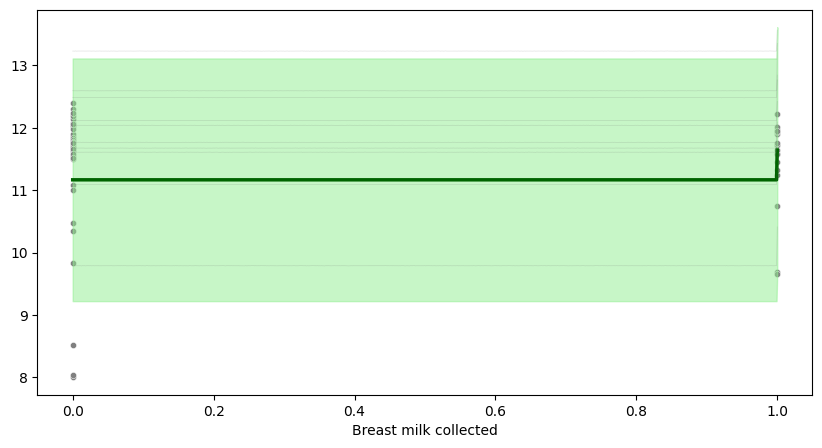

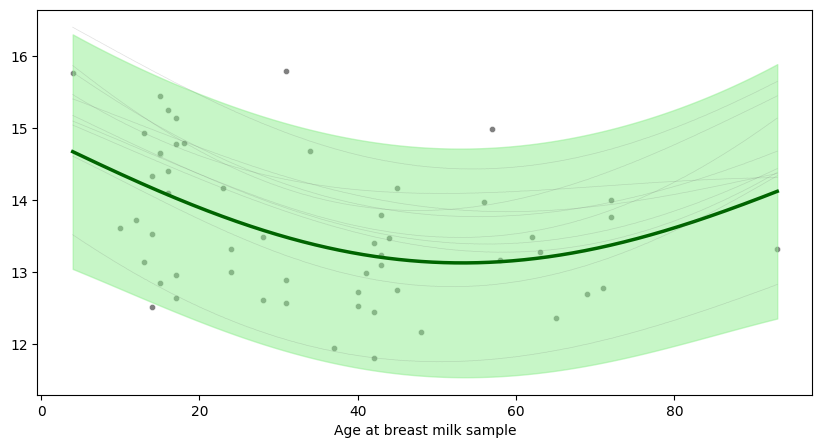

In [19]:
gps.plot_marginal(
    out_label='linolenate (18:3n3 or 3n6)',
    x_axis_label='Breast milk collected',
    unit_label=0
)

gps.plot_marginal(
    out_label='N-acetyl-isoputreanine',
    x_axis_label='Age at breast milk sample',
    unit_label=2
)

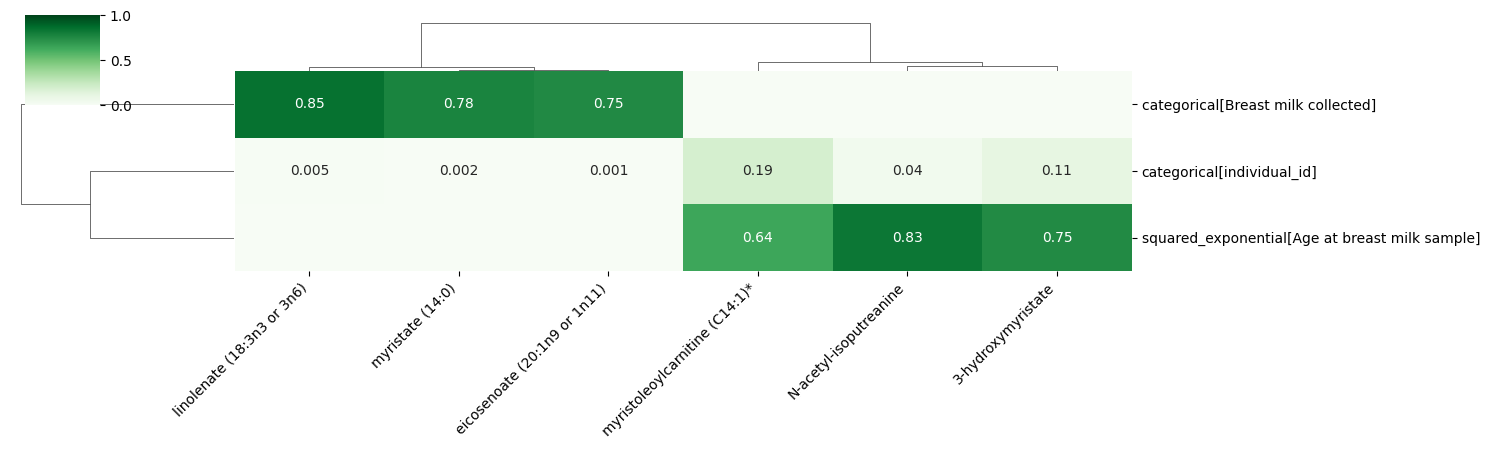

In [20]:
# Check out high level results
gps.plot_heatmap(var_cutoff=0.7)